# Lab 2 SGD
1. Learn to define and train a two-layer neural network model without activations using PyTorch.
2. Gain insights into the presence of multiple local minima in the loss landscape and how it affects the optimization process, and understand the concept of non-convexity in neural networks.
3. Implement manual updates for stochastic gradient descent (SGD) with momentum, without using an torch.optimizer, and compare the training loss, test loss, and accuracy with SGD using an optimizer.
4. Explore the generation of adversarial examples using algorithms like FGSM or PGD, and evaluate the model's robustness by measuring its accuracy on these examples compared to clean examples.


In [110]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [111]:
# Define the data preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image data
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


# Task1 

* Complet the model below with two fully connected layers without activations. 

* Provide a proof or explanation for the non-convexity of the two-layer neural network without activations. How can you demonstrate the presence of multiple local minima in the loss landscape?

* Run SGD to optimize the classification of the NN using opt.SGD with momentum, show the training loss, test loss, and accuracy 

In [112]:
# Define a two-layer neural network model with no activations
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.layer1 = nn.Linear(in_features=784, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=128)
        

    def forward(self, x):
        #ement the forward pass
        x = self.layer1(x.view(x.size(0) , -1))
        x = self.fc2(x)        
        return x

# Initialize models and optimizers
#  Initialize two instances of your TwoLayerNet model
model = TwoLayerNet()
# Define loss function
# : Define an appropriate loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()


In [113]:
# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TwoLayerNet().to(device)

# Training parameters
num_epochs = 10
learning_rate = 0.01

# Lists to store loss values and accuracies for plotting
train_losses_sgd = []
train_accuracies_sgd = []
test_losses_sgd = []
test_accuracies_sgd = []

# Define the optimizer
optimizer_sgd = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Training loop with optimizer (SGD)
for epoch in range(num_epochs):
    # Training
    model.train()  # Set the model to training mode
    running_loss = 0.0
    total_samples, total_correct = 0, 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_sgd.zero_grad()

        # Move data to the selected device (CPU or GPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass and backward pass, update model weights using the optimizer
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer_sgd.step()

        # Calculate predicted labels
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)

        # Update accuracy variables
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    # Calculate training accuracy and loss for this epoch
    train_accuracy = total_correct / total_samples
    train_accuracies_sgd.append(train_accuracy)
    train_losses_sgd.append(running_loss / len(trainloader))

    # Print the training accuracy
    print("Epoch [{}/{}], Train Accuracy: {:.2f}%".format(epoch + 1, num_epochs, train_accuracy * 100))

    # Testing
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    total_samples, total_correct = 0, 0

    with torch.no_grad():  # Disable gradient calculation during testing
        for i, data in enumerate(testloader, 0):
            inputs, labels = data

            # Move data to the selected device (CPU or GPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass and calculate loss
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            # Calculate predicted labels
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)

            # Update accuracy variables
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    # Calculate testing accuracy and loss for this epoch
    test_accuracy = total_correct / total_samples
    test_accuracies_sgd.append(test_accuracy)
    test_losses_sgd.append(running_loss / len(testloader))

    # Print the testing accuracy
    print("Epoch [{}/{}], Test Accuracy: {:.2f}%".format(epoch + 1, num_epochs, test_accuracy * 100))


Epoch [1/10], Train Accuracy: 87.06%
Epoch [1/10], Test Accuracy: 91.21%
Epoch [2/10], Train Accuracy: 90.35%
Epoch [2/10], Test Accuracy: 90.44%
Epoch [3/10], Train Accuracy: 90.97%
Epoch [3/10], Test Accuracy: 91.23%
Epoch [4/10], Train Accuracy: 91.05%
Epoch [4/10], Test Accuracy: 91.48%
Epoch [5/10], Train Accuracy: 91.40%
Epoch [5/10], Test Accuracy: 91.22%
Epoch [6/10], Train Accuracy: 91.51%
Epoch [6/10], Test Accuracy: 91.34%
Epoch [7/10], Train Accuracy: 91.42%
Epoch [7/10], Test Accuracy: 91.49%
Epoch [8/10], Train Accuracy: 91.73%
Epoch [8/10], Test Accuracy: 91.08%
Epoch [9/10], Train Accuracy: 91.69%
Epoch [9/10], Test Accuracy: 89.98%
Epoch [10/10], Train Accuracy: 91.72%
Epoch [10/10], Test Accuracy: 91.12%


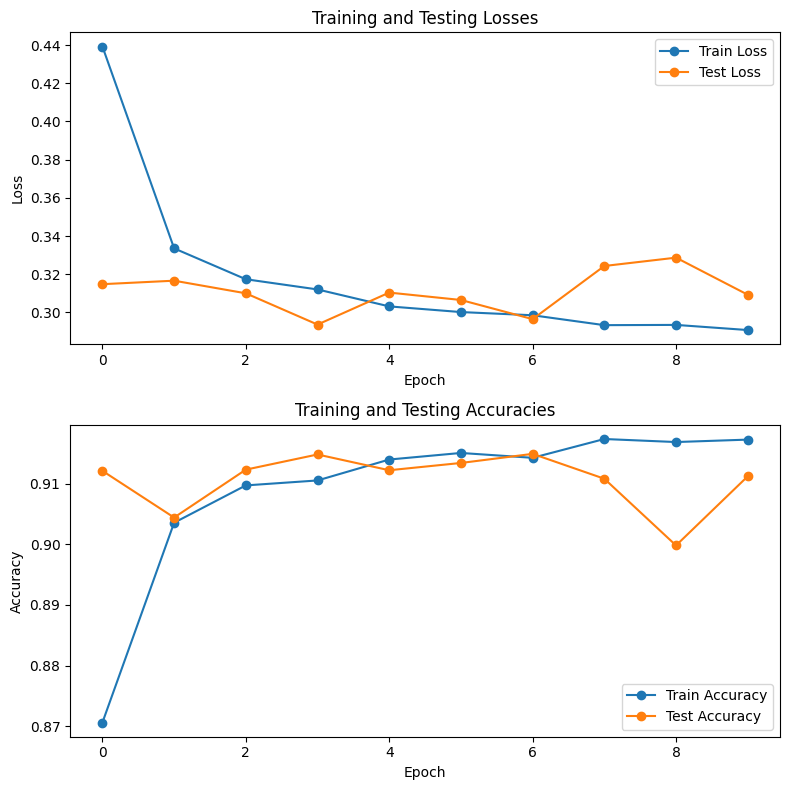

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots for losses and accuracies
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot training and testing losses
ax1.plot(train_losses_sgd, label='Train Loss', marker='o', linestyle='-')
ax1.plot(test_losses_sgd, label='Test Loss', marker='o', linestyle='-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Testing Losses')
ax1.legend()

# Plot training and testing accuracies
ax2.plot(train_accuracies_sgd, label='Train Accuracy', marker='o', linestyle='-')
ax2.plot(test_accuracies_sgd, label='Test Accuracy', marker='o', linestyle='-')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Testing Accuracies')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


The non-convexity of a two-layer neural network without activations can be demonstrated using a simple example. Let's consider a two-layer neural network with a single input, a single hidden neuron, and a single output neuron, both without activation functions. The network computes the output as follows:

Output = w2 * (w1 * Input)

In this case, the output is a linear function of the weights w1 and w2. However, the output landscape is non-convex when we consider a function with respect to w1 and w2. To demonstrate the non-convexity, we can visualize the output landscape in 3D. 

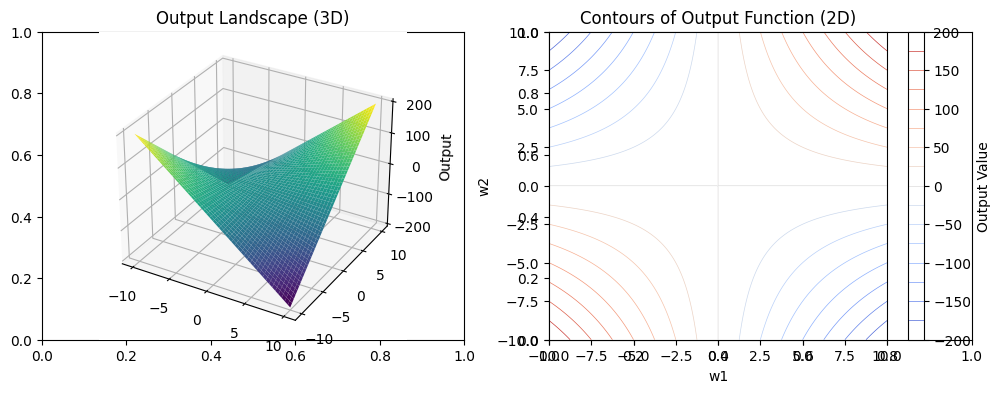

In [115]:
from mpl_toolkits.mplot3d import Axes3D

# Define the input value
Input = 2.0

# Create a grid of weight values for w1 and w2
w1_values = np.linspace(-10, 10, 200)
w2_values = np.linspace(-10, 10, 200)
w1_grid, w2_grid = np.meshgrid(w1_values, w2_values)

# Calculate the output values for the grid
output_values = 2.0 * w1_grid * w2_grid  # Output function: 2.0 * w1 * w2

# Create a figure with smaller-sized subplots set next to each other
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: 3D Output Landscape
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(w1_grid, w2_grid, output_values, cmap='viridis')
# ax1.set_xlabel('w1')
# ax1.set_ylabel('w2')
ax1.set_zlabel('Output')
ax1.set_title('Output Landscape (3D)')

# Subplot 2: Contours of Output Function
ax2 = fig.add_subplot(122)
contour_output = ax2.contour(w1_grid, w2_grid, output_values, levels=15, cmap='coolwarm', linewidths=0.5)
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.set_title('Contours of Output Function (2D)')
fig.colorbar(contour_output, ax=ax2, label='Output Value')

# Adjust subplot layout
# plt.tight_layout()

# Show the figure with subplots
plt.show()


However introducing any convex loss on top of such simple network would cancel the non-convexity.  Convexity in neural network loss landscapes can vary based on the network architecture and the nature of the problem. In more complex neural networks with non-linear activation functions and deeper structures, the loss landscape can become non-convex.

# Task 2

* Implements the SGD with momentum without the use of optimizer used in last task, show the training loss, test loss, and accuracy

* What is the bias of the momentum-baed gradient in SGD? Propose a way to improve it as taught in class

* How SGD with replacement is different than SGD without replacement. 

* Save the model to be loaded later for testing

In [116]:
# Training loop without optimizer (Incomplete)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TwoLayerNet().to(device)

loss_fn = nn.CrossEntropyLoss()
# Training parameters
num_epochs = 10
learning_rate = 0.01
beta = 0.9  # Momentum parameter

# Lists to store loss values and accuracies for plotting
train_losses_mSGD = []
train_accuracies_mSGD = []
test_losses_mSGD = []
test_accuracies_mSGD = []

# Approach 1 : start with zero
mom = []
for w in model.parameters():
    mom.append(torch.zeros_like(w))
# Approach 2 : start with same as g_0
# mom = []
# for w in model.parameters():
#     mom.append(torch.zeros_like(w))

# Training loop without optimizer (Manual SGD with Momentum)
for epoch in range(num_epochs):
    # Training
    model.train()  # Set the model to training mode
    running_loss = 0.0
    total_samples, total_correct = 0, 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Move data to the selected device (CPU or GPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass and manual parameter update with momentum
        model.zero_grad()
        loss.backward()
        i=0
        for w in model.parameters():
            mom[i] = beta * mom[i] + (1-beta) * w.grad
            w.data.sub_(learning_rate * (mom[i])/ (1-beta**(epoch+1) )) # unbiased gradient 
            i+=1

        # Calculate predicted labels
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)

        # Update accuracy variables
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    # Calculate training accuracy and loss for this epoch
    train_accuracy = total_correct / total_samples
    train_accuracies_mSGD.append(train_accuracy)
    train_losses_mSGD.append(running_loss / len(trainloader))

    # Print the training accuracy
    print("Epoch [{}/{}], Train Accuracy: {:.2f}%".format(epoch + 1, num_epochs, train_accuracy * 100))

    # Testing
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    total_samples, total_correct = 0, 0

    with torch.no_grad():  # Disable gradient calculation during testing
        for i, data in enumerate(testloader, 0):
            inputs, labels = data

            # Move data to the selected device (CPU or GPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass and calculate loss
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)

            # Calculate predicted labels
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)

            # Update accuracy variables
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    # Calculate testing accuracy and loss for this epoch
    test_accuracy = total_correct / total_samples
    test_accuracies_mSGD.append(test_accuracy)
    test_losses_mSGD.append(running_loss / len(testloader))

    # Print the testing accuracy
    print("Epoch [{}/{}], Test Accuracy: {:.2f}%".format(epoch + 1, num_epochs, test_accuracy * 100))


Epoch [1/10], Train Accuracy: 86.99%
Epoch [1/10], Test Accuracy: 90.74%
Epoch [2/10], Train Accuracy: 91.02%
Epoch [2/10], Test Accuracy: 91.56%
Epoch [3/10], Train Accuracy: 91.66%
Epoch [3/10], Test Accuracy: 91.79%
Epoch [4/10], Train Accuracy: 91.94%
Epoch [4/10], Test Accuracy: 92.19%
Epoch [5/10], Train Accuracy: 92.13%
Epoch [5/10], Test Accuracy: 91.90%
Epoch [6/10], Train Accuracy: 92.25%
Epoch [6/10], Test Accuracy: 92.14%
Epoch [7/10], Train Accuracy: 92.34%
Epoch [7/10], Test Accuracy: 92.16%
Epoch [8/10], Train Accuracy: 92.41%
Epoch [8/10], Test Accuracy: 92.10%
Epoch [9/10], Train Accuracy: 92.52%
Epoch [9/10], Test Accuracy: 92.39%
Epoch [10/10], Train Accuracy: 92.54%
Epoch [10/10], Test Accuracy: 92.29%


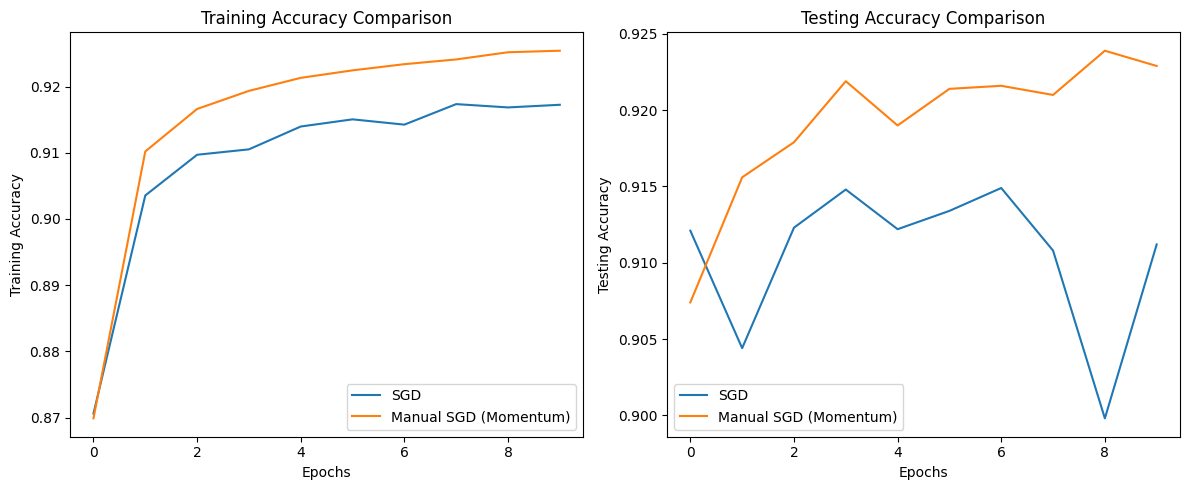

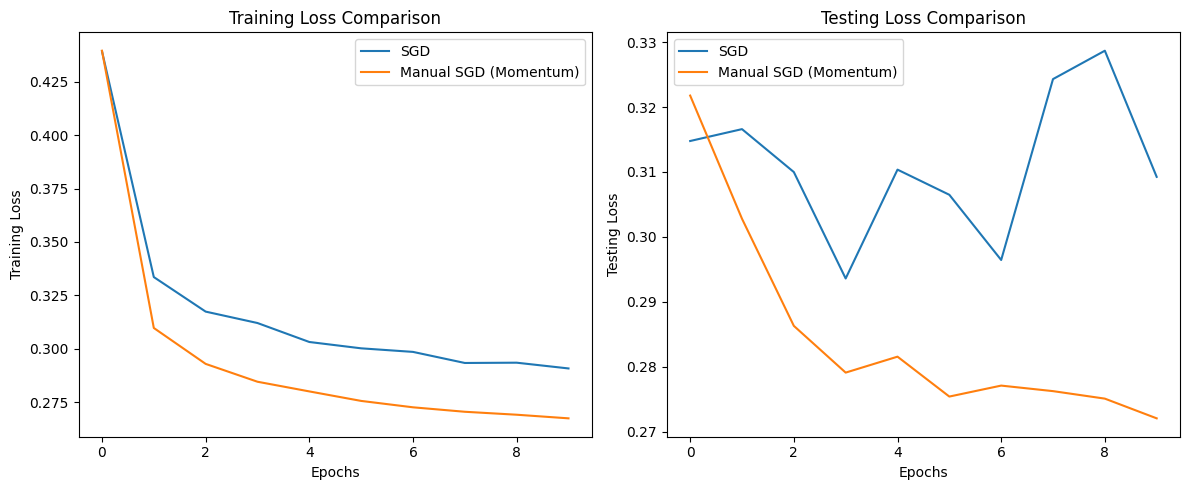

In [117]:
import matplotlib.pyplot as plt

# Plot training accuracies
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies_sgd, label='SGD')
plt.plot(train_accuracies_mSGD, label='Manual SGD (Momentum)')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Training Accuracy Comparison')

# Plot testing accuracies
plt.subplot(1, 2, 2)
plt.plot(test_accuracies_sgd, label='SGD')
plt.plot(test_accuracies_mSGD, label='Manual SGD (Momentum)')
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.title('Testing Accuracy Comparison')

plt.tight_layout()
plt.show()

# Plot training losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_sgd, label='SGD')
plt.plot(train_losses_mSGD, label='Manual SGD (Momentum)')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.title('Training Loss Comparison')

# Plot testing losses
plt.subplot(1, 2, 2)
plt.plot(test_losses_sgd, label='SGD')
plt.plot(test_losses_mSGD, label='Manual SGD (Momentum)')
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.legend()
plt.title('Testing Loss Comparison')

plt.tight_layout()
plt.show()


## SGD with replacement and without
Stochastic gradient methods for machine learning and optimization problems are typically studied under the assumption of sampling data points with replacement (i.i.d.). Conversely, the approach of sampling without replacement is less explored. Nevertheless, it is widely used in practice due to its simplicity in implementation and generally superior performance.
reference : https://proceedings.neurips.cc/paper/2016/file/c74d97b01eae257e44aa9d5bade97baf-Paper.pdf

# Task 3 

* Adversarial Examples Generation: Implement an algorithm such as Fast Gradient Sign Method (FGSM), or Projected Gradient Descent (PGD) to generate adversarial examples. These algorithms perturb the input data in a way that maximizes the model's prediction error while keeping the perturbations small.



In [118]:
def fgsm_attack(model, loss_fn, inputs, labels, epsilon):
    # Set the model to evaluation mode
    # model.eval()
    images = inputs.clone().detach().to(device)
    images.requires_grad = True
    # Forward pass to compute the loss
    outputs = model(images)
    cost = loss_fn(outputs,labels)
    grad = torch.autograd.grad(cost,images , retain_graph=False, create_graph=False)[0]
    # Create perturbed image by adding epsilon times the sign of the gradient
    perturbed_images = images + epsilon * grad.sign()
    # Clip the perturbed image to the valid range [0, 1]
    perturbed_images = torch.clamp(perturbed_images, 0, 1)
    return perturbed_images

# Task 4 

* Use the generated adversarial examples to evaluate the model's robustness. Feed the adversarial examples made from test loader into the model and measure the model's accuracy on these examples (how many of thesee are still correctly classified). Compare the model's performance on adversarial examples with its performance on clean examples to assess its vulnerability to adversarial attacks.

In [120]:
# Testing
model.eval()  # Set the model to evaluation mode
running_loss = 0.0
total_samples, total_correct = 0, 0

for i,data in enumerate(testloader):
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    inputs = fgsm_attack(model, loss_fn, images, labels, 0.01)
    # Forward pass and calculate loss
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    # Calculate predicted labels
    running_loss += loss.item()
    _, predicted = torch.max(outputs, 1)

    # Update accuracy variables
    total_samples += labels.size(0)
    total_correct += (predicted == labels).sum().item()

# Calculate testing accuracy and loss for this epoch
test_accuracy = total_correct / total_samples
test_accuracies_mSGD.append(test_accuracy)
test_losses_mSGD.append(running_loss / len(testloader))
print(f'accuracy on clean data was {test_accuracies_sgd[-1]}, but on attacked data is {test_accuracies_mSGD[-1]}')


accuracy on clean data was 0.9112, but on attacked data is 0.8476


Text(0.5, 1.0, 'attacked')

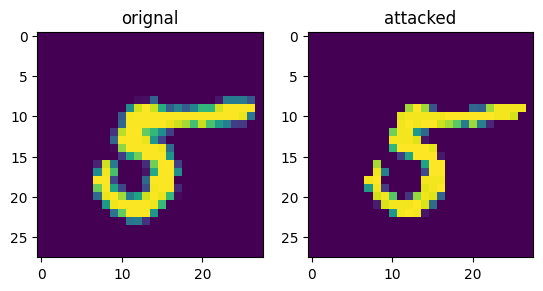

In [134]:
i = np.random.randint(len(images))
plt.subplot(1, 2, 1)
plt.imshow(images[i].squeeze())
plt.title('orignal')
plt.subplot(1, 2, 2)
plt.imshow(inputs[i].detach().numpy().squeeze())
plt.title('attacked')